## Страх и ненависть в Лас-Вегасе: Анализ Данных
У нас было 3 теста на определение мотивации, 75 ответов ФИ-шников, 5 разных гугл форм, дюжина туториалов и целое множество вопросов о мотивации всех сортов и расцветок, презентации, а также оценки по теорверу, английскому, вопросы по анализу данных, мат физике и ТПП. Не то чтобы это был необходимый запас для качественного опроса, но если уже начал просить людей в чате заполнить формочку, становится трудно остановиться. Единственное, что вызывало у меня опасение — это Эксель. Ничто в мире не бывает более беспомощным, безответственным и порочным, чем Эксель. Я знал, что рано или поздно мы перейдем и на эту дрянь.

In [1]:
import numpy as np
import pandas as pd
import os

import calculator as magic #own implementation

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

sns.set(style='whitegrid',palette='colorblind')

pd.set_option('max_columns',200)
pd.set_option('max_rows',200)

In [2]:
file = os.listdir('data/')[0]
data = pd.read_excel('data/'+file,parse_dates=['Timestamp'])
data = data[data["Курс"]==4]
data.reset_index(drop=True,inplace=True)

## Data Preprocessing and Tests evaluation

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = data.columns
test_1_indices = (7, 26)
test_2_indices = (27,87)

test_1_cols = cols[test_1_indices[0]:test_1_indices[1]+1]
test_2_cols = cols[test_2_indices[0]:test_2_indices[1]]
test_3_cols = cols[87:]

In [4]:
for col in cols[test_1_indices[0]:test_2_indices[1]]:
    data[col] = le.fit_transform(data[col])
data.head()

,Timestamp,Курс,Стать (бінарна),ТЙМС,Англійська або українська,"Назва предмету, який вважаєш проф-орієнтованим",Оцінка з цього предмету:,"1. Коли починаю будь-яку роботу, як правило, сподіваюся на успіх",2. Під час діяльності виявляю активність,3. Маю схильність до виявлення ініціативи\t,"4. Під час виконання відповідальних завдань намагаюся, якщо це можливо, знайти причини відмовитися від них","5. Часто обираю крайнощі: або надто легкі, або занадто важкі завдання","6. Якщо зустрічаю перешкоди, як правило, не відступаю, а шукаю можливості їх подолання\t","7. Коли успіхи і невдачі трапляються впереміжку, більше звертаю увагу на успіхи, а невдачами нехтую","8. Продуктивність діяльності переважно залежить від моєї власної цілеспрямованості, працьовитості, а не від зовнішніх причин","9. Коли завдання складні, а часу мало, результат діяльності погіршується\t",10. Я зазвичай наполегливий у досягненні мети,11. Планую своє майбутнє на достатньо віддалену перспективу,"12. Якщо ризикую, то скоріше обдумано","13. Не дуже наполегливий у досягненні мети, особливо, якщо відсутній зовнішній контроль","14. Волію ставити перед собою середні або злегка завищені завдання, які реально можу виконати\t","15. Якщо під час виконання будь-якого завдання мене спіткає невдача, воно стає для мене менш привабливим\t","16. Коли успіхи і невдачі трапляються впереміжку, більше звертаю уваги на невдачі \t",17. Планую своє майбутнє лише на найближчий час \t,"18. Я досягаю кращих результатів, коли час виконання обмежений, навіть якщо завдання досить складне\t",19. Не відмовляюсь від поставленої мети навіть у разі невдачі під час виконання будь-якої роботи \t,"20. Якщо завдання я обирав сам, тоді у разі невдачі воно ще більше мене приваблює\t","#1. Вивчення цього предмета дає мені можливість дізнатися чимало важливого для себе, проявити свої здібності. [Рівняння мат. фізики]","#1. Вивчення цього предмета дає мені можливість дізнатися чимало важливого для себе, проявити свої здібності. [Технології прикладного програмування]","#1. Вивчення цього предмета дає мені можливість дізнатися чимало важливого для себе, проявити свої здібності. [Аналіз даних]","#2. Предмет, що вивчається, мені цікавий, і я хочу знати якомога більше. [Рівняння мат. фізики]","#2. Предмет, що вивчається, мені цікавий, і я хочу знати якомога більше. [Технології прикладного програмування]","#2. Предмет, що вивчається, мені цікавий, і я хочу знати якомога більше. [Аналіз даних]","#3. У вивчені цього предмета мені достатньо тих знань, які я отримую на заняттях. [Рівняння мат. фізики]","#3. У вивчені цього предмета мені достатньо тих знань, які я отримую на заняттях. [Технології прикладного програмування]","#3. У вивчені цього предмета мені достатньо тих знань, які я отримую на заняттях. [Аналіз даних]","#4. Навчальні завдання з цього предмета мені нецікаві, я їх виконую, тому що цього вимагає викладач. [Рівняння мат. фізики]","#4. Навчальні завдання з цього предмета мені нецікаві, я їх виконую, тому що цього вимагає викладач. [Технології прикладного програмування]","#4. Навчальні завдання з цього предмета мені нецікаві, я їх виконую, тому що цього вимагає викладач. [Аналіз даних]","#5. Труднощі, що виникають при вивченні предмета, роблять його для мене ще більш захопливим. [Рівняння мат. фізики]","#5. Труднощі, що виникають при вивченні предмета, роблять його для мене ще більш захопливим. [Технології прикладного програмування]","#5. Труднощі, що виникають при вивченні предмета, роблять його для мене ще більш захопливим. [Аналіз даних]",#6. При вивченні предмета крім підручників і рекомендованої літератури я самостійно читаю додаткову літературу [Рівняння мат. фізики],#6. При вивченні предмета крім підручників і рекомендованої літератури я самостійно читаю додаткову літературу [Технології прикладного програмування],#6. При вивченні предмета крім підручників і рекомендованої літератури я самостійно читаю додаткову літературу [Аналіз даних],"#7. Вважаю, що важкі теоретичні питання з цього предмета мо

#### Test#1 evaluation

In [5]:
# Test1:
test_1_questions = np.arange(20)
test_1_positive_indices = np.array([1,2,3,6,8,10,11,12,14,16,18,19,20])-1

test_1_keys = {
    'positives' : test_1_positive_indices,
    'negatives' : np.array(list(set(test_1_questions)-set(test_1_positive_indices)))
}

def map_test_1_ans(x):
    if x>=14:
        return "Мотивація досягнення успіху"
    elif x>=8:
        return "Полюс не виражений"
    else:
        return 'Мотивація уникненя невдачі'
    
data['Test#1'] =data[test_1_cols].iloc[:,test_1_keys['positives']].sum(axis=1) + (data[test_1_cols].iloc[:,test_1_keys['negatives']]==0).sum(axis=1)
data['Test#1: інтерпретація'] = data['Test#1'].map(map_test_1_ans)

#### Test#2 evaluation

In [6]:
subj_1_cols = test_2_cols.take([i for i in range(len(test_2_cols)) if i%3==0])
subj_2_cols = test_2_cols.take([i for i in range(len(test_2_cols)) if i%3==1])
subj_3_cols = test_2_cols.take([i for i in range(len(test_2_cols)) if i%3==2])

test_2_questions = np.arange(20)
test_2_positive_indices = np.array([1,2,5,6,8,11,12,14,17,19])-1

test_2_keys = {
    'positives': test_2_positive_indices,
    'negatives': np.array(list(set(test_2_questions)-set(test_2_positive_indices)))
}

def map_test_2_ans(x):
    if x>=15:
        return "Високий рівень внутрішньої мотивації"
    elif x>=6:
        return "Середній рівень внутрішньої мотивації"
    else:
        return "Низький рівень внутрішньої мотивації"
    
def eval_test_2(column_name,subj_cols,column_name_shortened):
    data['Test#2: ' + column_name] = (data[subj_cols].iloc[:,test_2_keys['positives']]>1).sum(axis=1)+(data[subj_cols].iloc[:,test_2_keys['negatives']]<2).sum(axis=1)
    data['Test#2: ' + column_name_shortened + ' - інтерпретація'] = data['Test#2: ' + column_name].map(map_test_2_ans)
    
eval_test_2('Рівняння мат. фізики',subj_1_cols, 'Мат.Фіз.')
eval_test_2('Технології прикладного програмування', subj_2_cols,'ТПП')
eval_test_2('Аналіз даних', subj_3_cols,'АД')

#### Test#3 evaluation

In [7]:
scales_dict = {
    'Комунікативні мотиви': np.array([7,10,14,32])-1,
    'Мотиви уникнення': np.array([6,12,13,15,19])-1,
    'Мотиви престижу': np.array([8,9,29,30,34])-1,
    'Професійні мотиви': np.array([1,2,3,4,5,26])-1,
    'Мотиви творчої самореалізації': np.array([27,28])-1,
    'Навчально-пізнавальні мотиви': np.array([17,18,20,21,22,23,24])-1,
    'Соціальні мотиви': np.array([11,16,25,31,33])-1,
}
for key in scales_dict.keys():
    data[key] = data[test_3_cols].iloc[:,scales_dict[key]].mean(axis=1).round(4)
    
data.head(3)

,Timestamp,Курс,Стать (бінарна),ТЙМС,Англійська або українська,"Назва предмету, який вважаєш проф-орієнтованим",Оцінка з цього предмету:,"1. Коли починаю будь-яку роботу, як правило, сподіваюся на успіх",2. Під час діяльності виявляю активність,3. Маю схильність до виявлення ініціативи\t,"4. Під час виконання відповідальних завдань намагаюся, якщо це можливо, знайти причини відмовитися від них","5. Часто обираю крайнощі: або надто легкі, або занадто важкі завдання","6. Якщо зустрічаю перешкоди, як правило, не відступаю, а шукаю можливості їх подолання\t","7. Коли успіхи і невдачі трапляються впереміжку, більше звертаю увагу на успіхи, а невдачами нехтую","8. Продуктивність діяльності переважно залежить від моєї власної цілеспрямованості, працьовитості, а не від зовнішніх причин","9. Коли завдання складні, а часу мало, результат діяльності погіршується\t",10. Я зазвичай наполегливий у досягненні мети,11. Планую своє майбутнє на достатньо віддалену перспективу,"12. Якщо ризикую, то скоріше обдумано","13. Не дуже наполегливий у досягненні мети, особливо, якщо відсутній зовнішній контроль","14. Волію ставити перед собою середні або злегка завищені завдання, які реально можу виконати\t","15. Якщо під час виконання будь-якого завдання мене спіткає невдача, воно стає для мене менш привабливим\t","16. Коли успіхи і невдачі трапляються впереміжку, більше звертаю уваги на невдачі \t",17. Планую своє майбутнє лише на найближчий час \t,"18. Я досягаю кращих результатів, коли час виконання обмежений, навіть якщо завдання досить складне\t",19. Не відмовляюсь від поставленої мети навіть у разі невдачі під час виконання будь-якої роботи \t,"20. Якщо завдання я обирав сам, тоді у разі невдачі воно ще більше мене приваблює\t","#1. Вивчення цього предмета дає мені можливість дізнатися чимало важливого для себе, проявити свої здібності. [Рівняння мат. фізики]","#1. Вивчення цього предмета дає мені можливість дізнатися чимало важливого для себе, проявити свої здібності. [Технології прикладного програмування]","#1. Вивчення цього предмета дає мені можливість дізнатися чимало важливого для себе, проявити свої здібності. [Аналіз даних]","#2. Предмет, що вивчається, мені цікавий, і я хочу знати якомога більше. [Рівняння мат. фізики]","#2. Предмет, що вивчається, мені цікавий, і я хочу знати якомога більше. [Технології прикладного програмування]","#2. Предмет, що вивчається, мені цікавий, і я хочу знати якомога більше. [Аналіз даних]","#3. У вивчені цього предмета мені достатньо тих знань, які я отримую на заняттях. [Рівняння мат. фізики]","#3. У вивчені цього предмета мені достатньо тих знань, які я отримую на заняттях. [Технології прикладного програмування]","#3. У вивчені цього предмета мені достатньо тих знань, які я отримую на заняттях. [Аналіз даних]","#4. Навчальні завдання з цього предмета мені нецікаві, я їх виконую, тому що цього вимагає викладач. [Рівняння мат. фізики]","#4. Навчальні завдання з цього предмета мені нецікаві, я їх виконую, тому що цього вимагає викладач. [Технології прикладного програмування]","#4. Навчальні завдання з цього предмета мені нецікаві, я їх виконую, тому що цього вимагає викладач. [Аналіз даних]","#5. Труднощі, що виникають при вивченні предмета, роблять його для мене ще більш захопливим. [Рівняння мат. фізики]","#5. Труднощі, що виникають при вивченні предмета, роблять його для мене ще більш захопливим. [Технології прикладного програмування]","#5. Труднощі, що виникають при вивченні предмета, роблять його для мене ще більш захопливим. [Аналіз даних]",#6. При вивченні предмета крім підручників і рекомендованої літератури я самостійно читаю додаткову літературу [Рівняння мат. фізики],#6. При вивченні предмета крім підручників і рекомендованої літератури я самостійно читаю додаткову літературу [Технології прикладного програмування],#6. При вивченні предмета крім підручників і рекомендованої літератури я самостійно читаю додаткову літературу [Аналіз даних],"#7. Вважаю, що важкі теоретичні питання з цього предмета мо

1. Скласти інтервальний статистичний ряд (таблицю частот) для кожного тесту. Кількість інтервалів групування для тесту 1 — три, для тесту 2– чотири, для наступних тестів -формула Стерджесса.

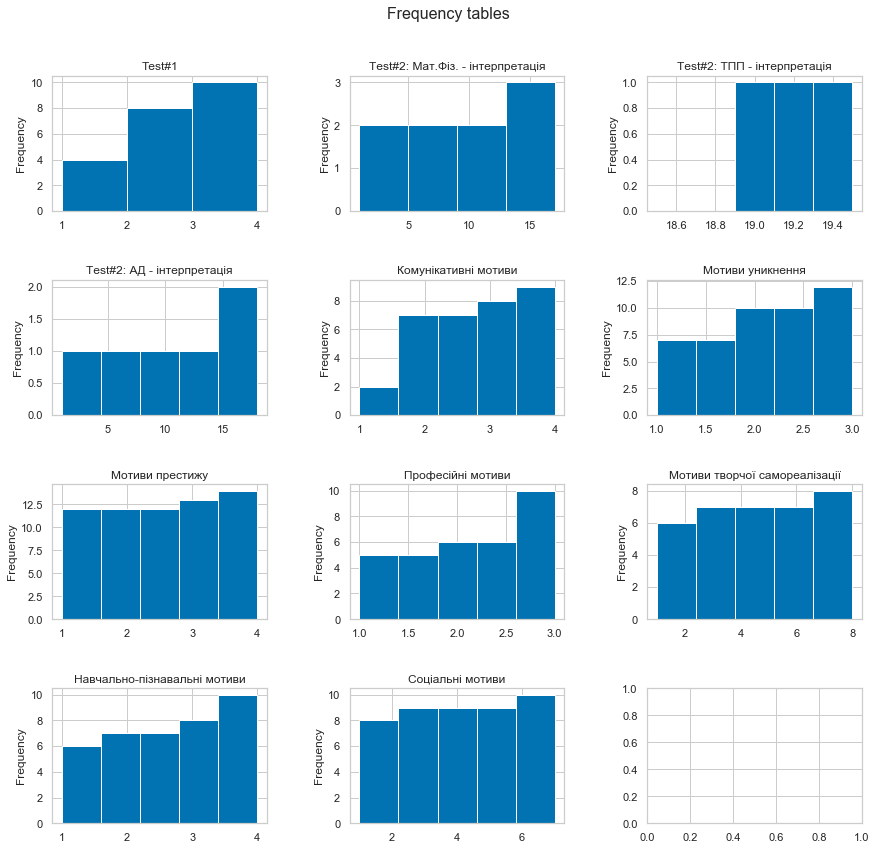

In [8]:
def plot_cumulative_hist(ax,col,bins):
    data[col].value_counts().plot(ax=ax,kind='hist',cumulative=True,bins=bins,title=col)
    
def sturges(n):
    return 1 + np.log2(n)

tests = ['Test#1','Test#2: Мат.Фіз. - інтерпретація','Test#2: ТПП - інтерпретація','Test#2: АД - інтерпретація','Комунікативні мотиви','Мотиви уникнення','Мотиви престижу','Професійні мотиви','Мотиви творчої самореалізації','Навчально-пізнавальні мотиви','Соціальні мотиви']
fig, axs = plt.subplots(4,3,figsize=(12,12))
fig.tight_layout(h_pad=5, w_pad=5)
fig.suptitle('Frequency tables',fontsize=16)

for i in range(len(tests)):
    i1,i2 = i//3,i%3    
    if i==0:
        bins=3
    elif i==1:
        bins=4
    else:
        bins = int(sturges(data.shape[0]))
    
    plot_cumulative_hist(axs[i1,i2],tests[i],bins)        
fig.subplots_adjust(top=0.9)

### Graphs:
2. Візуалізувати дані (для статті, оцінок, ознак з тестів 1,2,3). Побудувати полігон, гістограму, емпіричну функцію розподілу, кумулятивну криву,  - “”відмітити на ній медіану та квартилі для оцінок, ознак з тестів 1, 2.


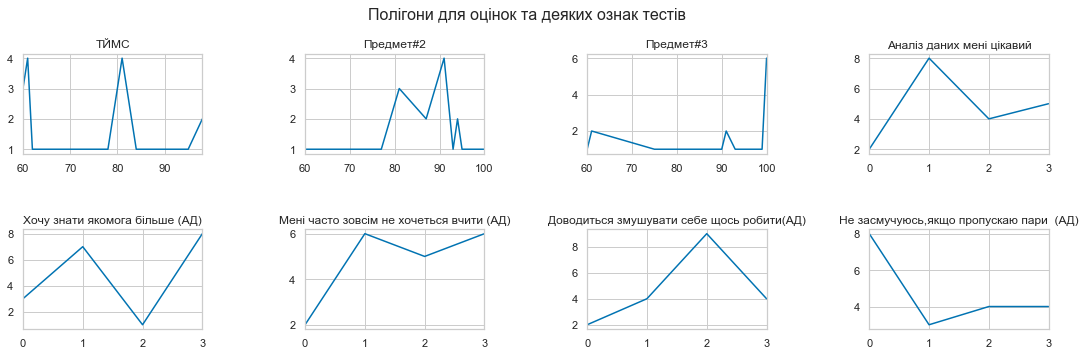

In [9]:
data.rename(columns={'Англійська або українська':'Предмет#2','Оцінка з цього предмету:':'Предмет#3'},inplace=True)
columns = ['ТЙМС','Предмет#2','Предмет#3','#1. Вивчення цього предмета дає мені можливість дізнатися чимало важливого для себе, проявити свої здібності. [Аналіз даних]',
           '#2. Предмет, що вивчається, мені цікавий, і я хочу знати якомога більше. [Аналіз даних]',
               '#9. На заняттях з цього предмета у мене часто буває такий стан, коли «зовсім не хочеться вчитися». [Аналіз даних]',
               '#18. Цей предмет дається мені важко, доводиться змушувати себе виконувати учбові завдання. [Аналіз даних]',
               '#19. Якщо через хворобу ( або з інших причин) я пропускаю пари з цього предмета, то мене це засмучує. [Аналіз даних]'
          ]
titles_dict = {
    '#1. Вивчення цього предмета дає мені можливість дізнатися чимало важливого для себе, проявити свої здібності. [Аналіз даних]':'Аналіз даних мені цікавий',
    '#2. Предмет, що вивчається, мені цікавий, і я хочу знати якомога більше. [Аналіз даних]':'Хочу знати якомога більше (АД)',
    '#9. На заняттях з цього предмета у мене часто буває такий стан, коли «зовсім не хочеться вчитися». [Аналіз даних]':'Мені часто зовсім не хочеться вчити (АД)',
    '#18. Цей предмет дається мені важко, доводиться змушувати себе виконувати учбові завдання. [Аналіз даних]':'Доводиться змушувати себе щось робити(АД)',
    '#19. Якщо через хворобу ( або з інших причин) я пропускаю пари з цього предмета, то мене це засмучує. [Аналіз даних]':'Не засмучуюсь,якщо пропускаю пари  (АД)'
}

marks = data[['ТЙМС','Предмет#2','Предмет#3']]

fig,axs = plt.subplots(2,4,figsize=(15,5))
fig.tight_layout(h_pad=6, w_pad=7)
fig.suptitle('Полігони для оцінок та деяких ознак тестів',fontsize=16)
fig.subplots_adjust(top=0.85)

for i,col in enumerate(columns):
    if col in titles_dict:
        title = titles_dict[col]
    else:
        title = col
    data[col].value_counts().sort_index().plot(ax=axs[i//4,i%4],title=title)

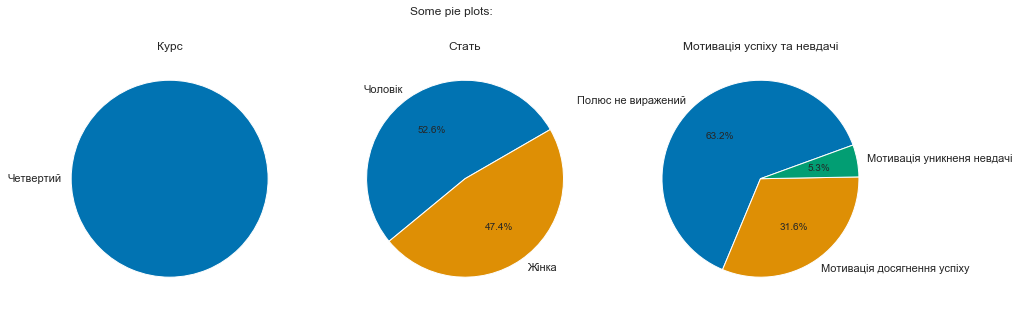

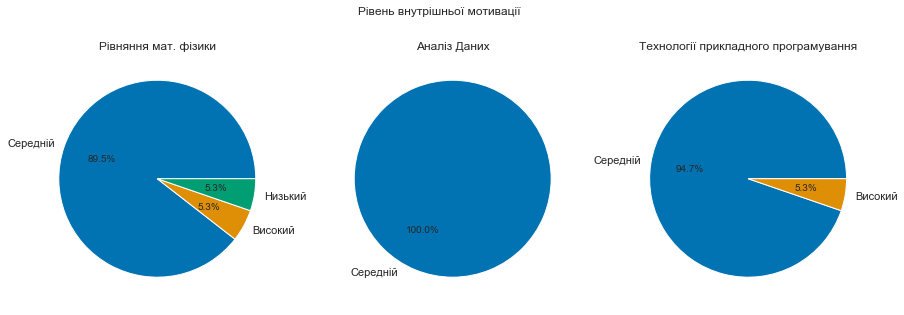

In [10]:
def correct_labels(i):
    for j in range(3):
        ax[j].set_ylabel('')
        ax[j].set_title(suptitles[i][j])


suptitles = [['Курс','Стать','Мотивація успіху та невдачі'],['Рівняння мат. фізики', 'Аналіз Даних', 'Технології прикладного програмування']]
test2_labels = ['Середній','Високий','Низький']

fig,ax = plt.subplots(1,3,figsize=(15,5))
plt.suptitle('Some pie plots:')
data['Курс'].value_counts().plot(ax=ax[0],kind='pie',labels=['Четвертий'])
data['Стать (бінарна)'].value_counts().plot(ax=ax[1],kind='pie',autopct='%1.1f%%',startangle=30)
data['Test#1: інтерпретація'].value_counts().plot(ax=ax[2],kind='pie',autopct='%1.1f%%',startangle=20)
correct_labels(0)

fig,ax=plt.subplots(1,3,figsize=(15,5))
plt.suptitle('Рівень внутрішньої мотивації')
data['Test#2: Мат.Фіз. - інтерпретація'].value_counts().plot(ax=ax[0],kind='pie',autopct='%1.1f%%',startangle=0,labels=test2_labels)
data['Test#2: ТПП - інтерпретація'].value_counts().plot(ax=ax[1],kind='pie',autopct='%1.1f%%',startangle=60,labels=test2_labels)
data['Test#2: АД - інтерпретація'].value_counts().plot(ax=ax[2],kind='pie',autopct='%1.1f%%',startangle=0,labels=test2_labels)
correct_labels(1)

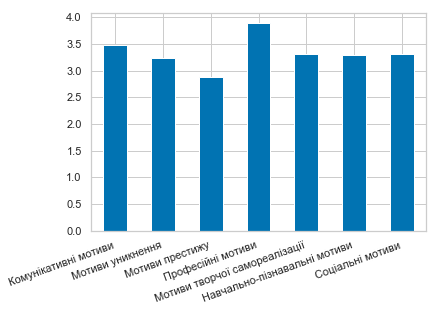

In [11]:
data.iloc[:,129:].mean().plot(kind='bar')
plt.xticks(rotation=20,ha="right");

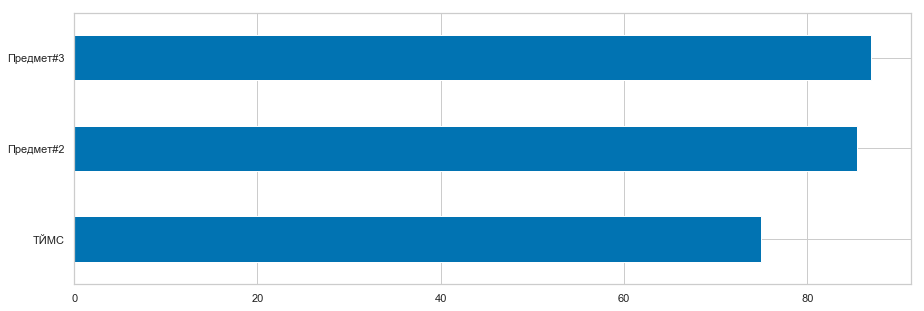

In [12]:
grade_cols = ['ТЙМС','Предмет#2','Предмет#3']
data[grade_cols].mean().plot(figsize=(15,5),kind='barh')

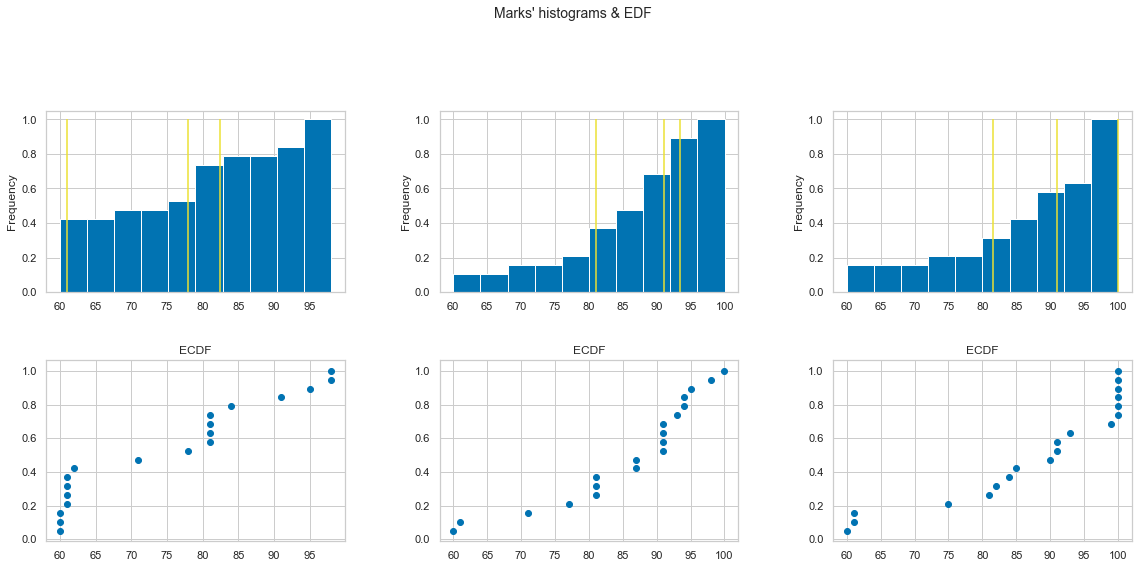

In [13]:
fig, axs = plt.subplots(2,3,figsize = (16,8))
fig.suptitle("Marks' histograms & EDF",fontsize=14)
for i,col in enumerate(grade_cols):
    data[col].plot(kind='hist',cumulative=True,density=True,ax=axs[0,i])
    percentiles = np.percentile(data[col], [25, 50, 75])
    axs[0,i].vlines(percentiles, ymin=0, ymax=1, color='y')
        
    n =data[col].shape[0]
    axs[1,i].scatter(np.sort(data[col]), np.arange(1, n+1) / n)
    axs[1,i].set_title('ECDF')

fig.tight_layout(w_pad = 5,h_pad = 5)
fig.subplots_adjust(top = 0.8)

3. (числові характеристики центральної тенденції та розкиду для оцінок та 2-х тестів — 2 б) Обчислити числові характеристики центральної тенденції та розкиду: вибіркове середнє, дисперсію, середньоквадратичне відхилення, моду, медіану, коефіцієнти асиметрії та ексцесу. Для обчислення застосувати табл.1 з прикладу 1.

In [14]:
pd.DataFrame([magic.mean(marks),magic.variance(marks),magic.stddev(marks),magic.mode(marks),magic.median(marks),magic.skewness(marks),magic.kurtosis(marks)],
             index=['mean','var','std','mode','median','skewness','kurtosis'])

,ТЙМС,Предмет#2,Предмет#3
mean,75.000000,85.473684,87.000000
var,199.555556,132.040936,196.333333
std,14.126413,11.490907,14.011900
mode,61.000000,91.000000,100.000000
median,78.000000,91.000000,91.000000
skewness,0.501609,-1.703933,-1.457826
kurtosis,-1.333915,0.111179,-0.471357


4. (коробки з вусами для оцінок та 2-х тестів — 2б) Побудувати коробки з вусами відносно середнього і відносно медіани.

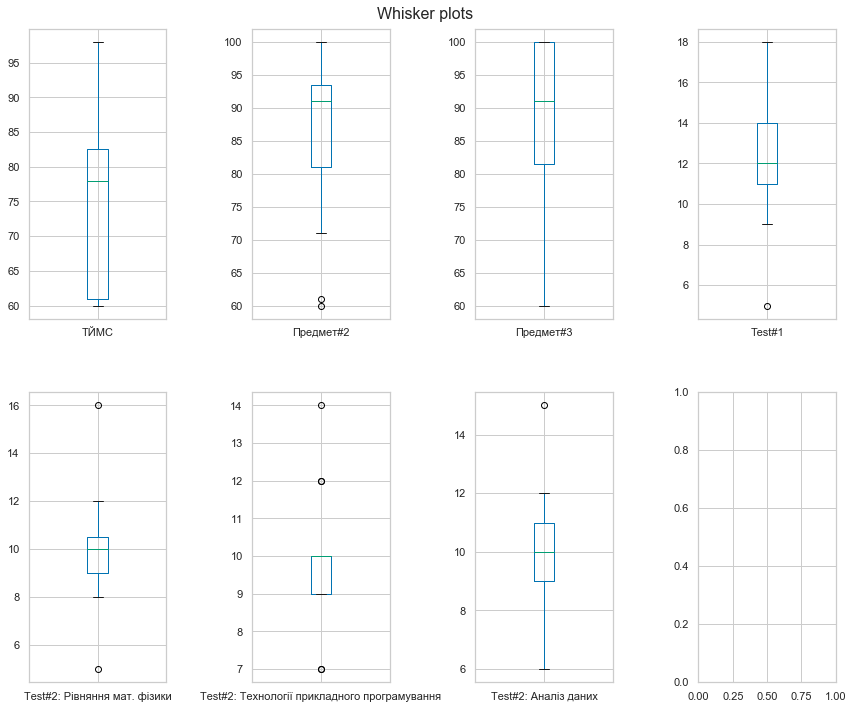

In [15]:
cols = ['ТЙМС','Предмет#2','Предмет#3','Test#1','Test#2: Рівняння мат. фізики','Test#2: Технології прикладного програмування','Test#2: Аналіз даних']

fig,axs = plt.subplots(2,4,figsize=(12,10))

fig.tight_layout(h_pad=5, w_pad=5)
fig.suptitle('Whisker plots',fontsize=16)
fig.subplots_adjust(top=0.95)

for i,col in enumerate(cols):
    i1,i2 = i//4,i%4
    data[col].plot(ax=axs[i1,i2],kind='box')

5. (статистичні похибки для оцінок та 2-х тестів -2б) Визначити статистичну похибку у тесті дослідження середнього балу з кожної дисципліни і у тесті дослідження проценту жіночої статті  (пропорції). Дослідити звязок з обємом вибірки. Визначити інтервальні оцінки.

In [16]:
tests_cols = ['Test#1','Test#2: Аналіз даних']
moe_index = tests_cols+list(marks.columns)#moe: margin of error
moe_columns = ["Sample size",'Margin of error']

moe = pd.DataFrame(index=moe_index, columns=moe_columns)
for col in moe_index:
    moe.loc[col]['Sample size'] = magic.sample_size_avg_score(magic.stddev(data[col]),5)
    moe.loc[col]['Margin of error']= magic.margin_of_error_avg_score(30,magic.stddev(data[col]))
moe

,Sample size,Margin of error
Test#1,1.53754,1.13194
Test#2: Аналіз даних,0.63173,0.725563
ТЙМС,30.6645,5.05507
Предмет#2,20.2899,4.11197
Предмет#3,30.1694,5.01409


In [29]:
gender_proportion = pd.DataFrame(index=['gender'],columns=moe_columns)
gender_proportion.loc['gender']['Sample size'] = magic.sample_size_proportion(0.178,10/19)
gender_proportion.loc['gender']['Margin of error'] = magic.margin_of_error_proportion(30,10/19)
gender_proportion

,Sample size,Margin of error
gender,30.2279,0.178675


6. (метод моментів для оцінок -2б) Методом моментів знайти параметри розподілів. (нормальний, Стьюдента), зробити графік, порівняти гістограму і графік розподілу.

In [19]:
def ddof(x):
    return -2*x/(1-x)
ddof(marks['ТЙМС'].var())#params of t dist

2.010072747621712

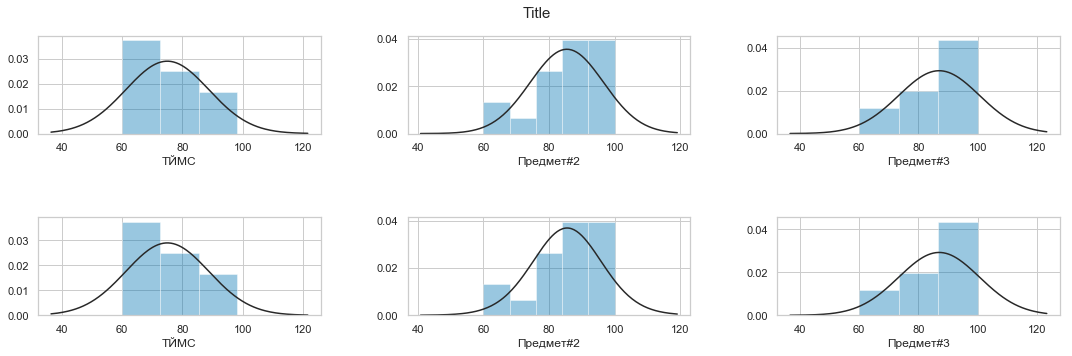

In [20]:
fig,axs = plt.subplots(2,3,figsize=(15,5))
plt.suptitle('Title',fontsize=15)
for i,col in enumerate(marks):
    mu,sigma = marks[col].mean(),marks[col].var()    
    sns.distplot(marks[col],fit=stats.norm,kde=False,ax=axs[i//3,i%3])
    sns.distplot(marks[col],fit=stats.t,kde=False,ax=axs[1+i//3,i%3])
fig.tight_layout(h_pad=5, w_pad=5)

fig.subplots_adjust(top=0.9)
